In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\M.dhiinesh\Desktop\sofia\sem2\wine.csv')
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
data.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [4]:
data.tail(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


# Exploring the dataframe


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
data.shape

(129971, 14)

In [7]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [8]:
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [9]:
data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

# Cleaning the data

In [10]:
data.duplicated().sum()

0

In [11]:
data.duplicated().any()

False

In [12]:
data.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [13]:
# cleaning the feature 
data['title']=data['title'].apply(lambda x: x.split('(')[-1])

In [14]:
data['title']=data['title'].apply(lambda x: x.split(')')[0])

In [15]:
data['title'].head()

0                   Etna
1                  Douro
2      Willamette Valley
3    Lake Michigan Shore
4      Willamette Valley
Name: title, dtype: object

In [16]:
data['title'].unique()

array(['Etna', 'Douro', 'Willamette Valley', ..., 'Psagot 2014 Merlot',
       'Col Vetoraz Spumanti NV  Prosecco Superiore di Cartizze',
       'Henri de Villamont 2005  Grands-Echezeaux'], dtype=object)

In [17]:
data['title'].value_counts()

WA                                                        5276
Napa Valley                                               4480
Russian River Valley                                      3091
California                                                2629
Paso Robles                                               2350
                                                          ... 
Château Latour-Laguens 2012  Bordeaux Blanc                  1
Château la France 2012  Bordeaux Blanc                       1
Elizabeth Chambers 2012 Lazy River Vineyard Pinot Noir       1
Louis Latour 2006  Chassagne-Montrachet                      1
Henri de Villamont 2005  Grands-Echezeaux                    1
Name: title, Length: 11018, dtype: int64

# Droping the Columns

In [18]:
# droping columns for general requriment and these columns won't be that much useful for our analysis.
data.drop(['Unnamed: 0','region_1','designation',
           'taster_name','taster_twitter_handle'],axis=1, inplace=True)

In [19]:
# droping columns for 60% of null value 
data.drop(['region_2'],axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [21]:
data.isnull().sum()

country          63
description       0
points            0
price          8996
province         63
title             0
variety           1
winery            0
dtype: int64

In [22]:
data.shape

(129971, 8)

# Feature Engineering

##   Imputation

F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


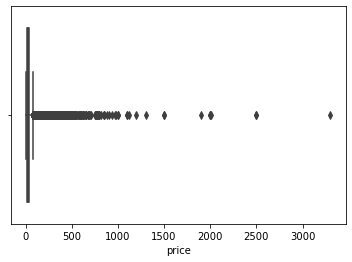

In [23]:
# checking outliers in price to decide for mean or median to fill our missing values 
sns.boxplot(data['price'])
plt.show()

In [24]:
data['price'].fillna(data['price'].median(), inplace = True)

In [25]:
data['province'].mode()[0]

'California'

In [26]:
data['province']=data['province'].fillna(data['province'].mode()[0])

In [27]:
data['variety'].mode()[0]

'Pinot Noir'

In [28]:
data['variety']=data['variety'].fillna(data['variety'].mode()[0])

In [29]:
data.isnull().sum()

country        63
description     0
points          0
price           0
province        0
title           0
variety         0
winery          0
dtype: int64

In [30]:
data['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [31]:
data['country'].mode()[0]

'US'

In [32]:
data['country']=data['country'].fillna(data['country'].mode()[0])

In [33]:
data.isnull().sum()

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64

# Handling outliers

In [34]:
# distribution of numerical data
data_num = data.select_dtypes(include = np.number)
data_num.head(2)

,points,price
0,87,25.0
1,87,15.0


F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


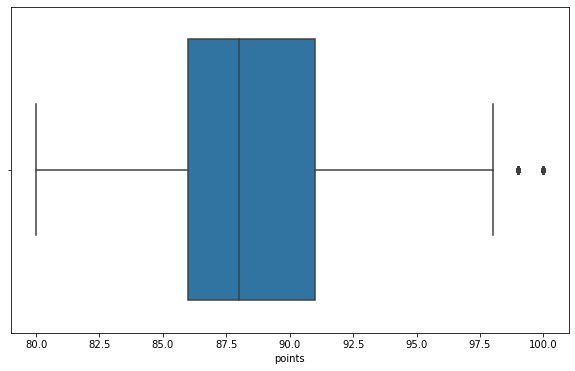

F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


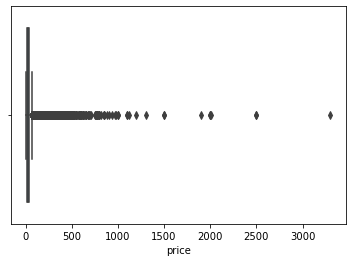

In [35]:
# there is only two numerical feature in the data set let check the outliers by boxplot
# before outliers

plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.boxplot(data[i])
    plt.show()

In [36]:
# Outlier Treatment for points

Q1 = data.points.quantile(0.25)
Q3 = data.points.quantile(0.75)

IQR = Q3 - Q1
data = data[(data.points >= Q1 - 1.5*IQR) & (data.points <= Q3 + 1.5*IQR)]

In [37]:
# Outlier Treatment for price 

Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)

IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


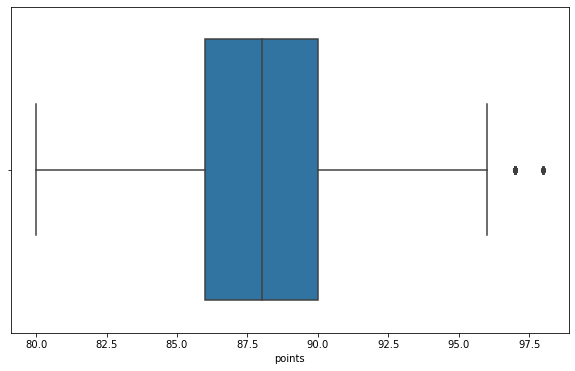

F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


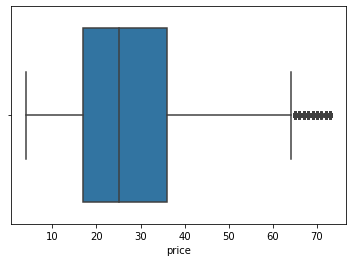

In [38]:
#after outlier
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.boxplot(data[i])
    plt.show()

In [39]:
# after handling missing value and outliers our data shape 
data.shape

(120912, 8)

# Explortory Data Analysis

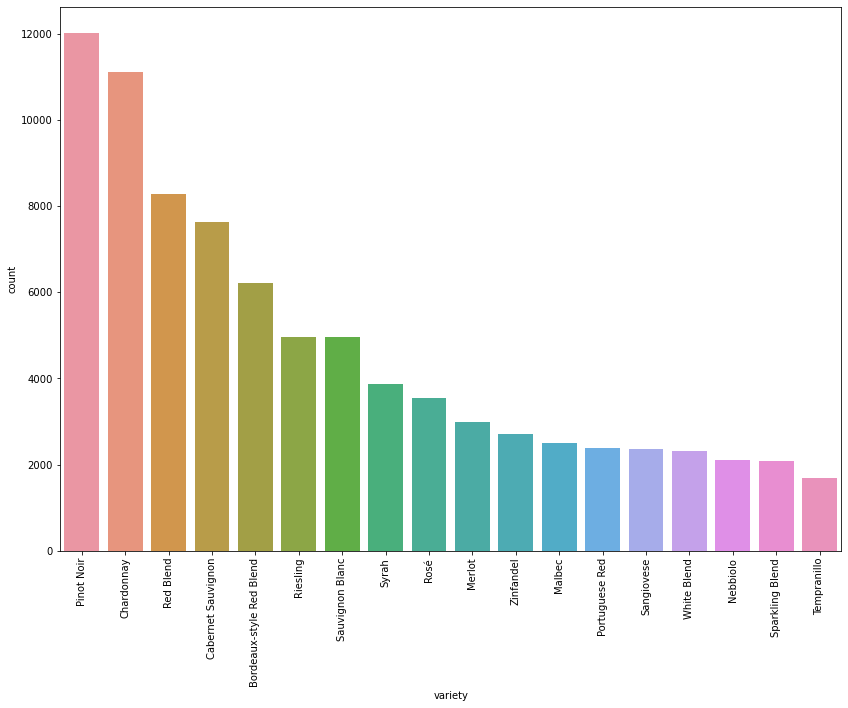

In [43]:
variety_df = data.groupby('variety').filter(lambda x: len(x) > 1500)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (14, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

A more clear viewing of the 15 wine varieties - looks like some of the more popular wines are included!

number of Province 424


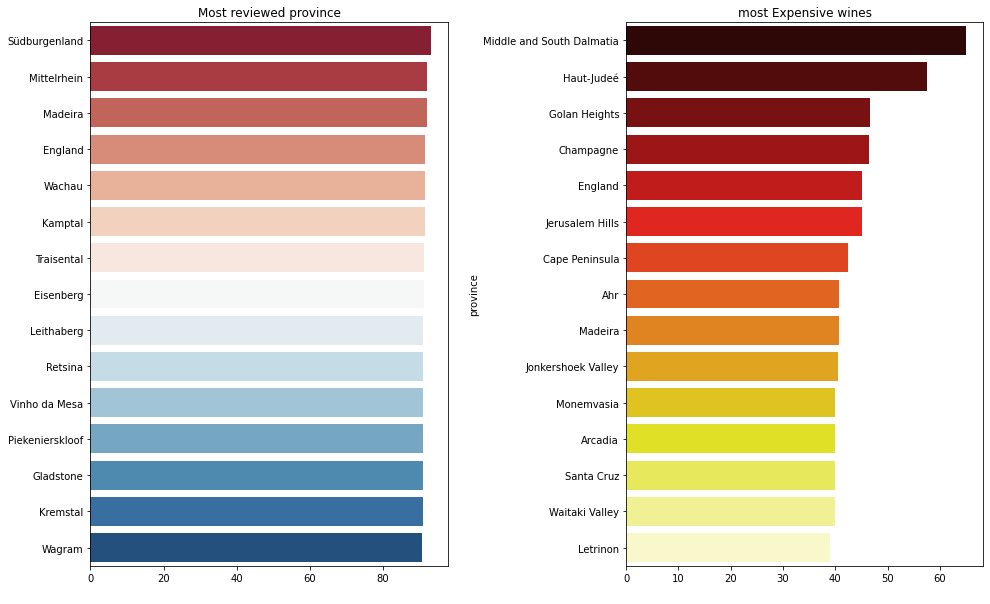

In [45]:
print('number of Province',data['province'].nunique())
f,ax=plt.subplots(1,2,figsize=(16,10))
ax1,ax2=ax.flatten()
cnt=data.groupby(['province'])['points'].mean().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, data=cnt, palette='RdBu', ax=ax1)
ax1.set_title('Most reviewed province')
ax1.set_ylabel('')
ax1.set_xlabel(' ')

cnt=data.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, data=cnt,palette='hot', ax=ax2)
ax2.set_title('most Expensive wines')
ax2.set_xlabel(' ')

plt.subplots_adjust(wspace=0.5)

In the sight,

we can understand about the most reviewed province and most expensive wines

number of country list in data 43


Text(0.5, 1.0, 'distribution of wine reviews by top 20 countries')

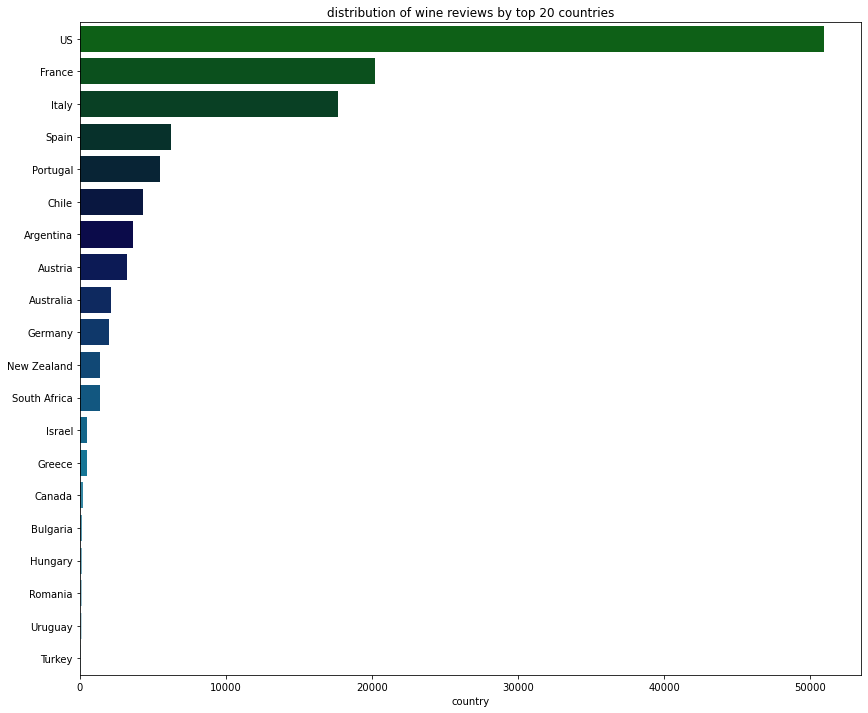

In [46]:
print('number of country list in data',data['country'].nunique())
plt.figure(figsize=(14,12))
cnt=data['country'].value_counts().to_frame()[0:20]
sns.barplot(x=cnt['country'], y=cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('distribution of wine reviews by top 20 countries')

The US is the largest producer of wines.It has 54504 types of wines.It is about 41% of the entire dataset.

In [49]:
data.pivot_table(values='price',index='country').sort_values('price',ascending=False)


,price
country,
England,45.140625
US,31.680865
Canada,31.563025
Italy,29.470968
Israel,29.259794
Switzerland,29.250000
Germany,28.697615
Austria,27.583282
Hungary,27.496183


So,typically in England wines are much costly while in Ukraine we can find the most cheaper wines available.

In [50]:
# EDA with pandasprofiling
from pandas_profiling import ProfileReport

In [51]:
pandas_profile=ProfileReport(data,title='Pandas Profiling report')
pandas_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Almost all datasets now have categorical variables. Each categorical variable consists of unique values. A categorical feature is said to possess high cardinality when there are too many of these unique values. One-Hot Encoding becomes a big problem in such a case since we have a separate column for each unique value (indicating its presence or absence) in the categorical variable. This leads to two problems, one is obviously space consumption, but this is not as big a problem as the second problem, the curse of dimensionality.

F:\sofia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


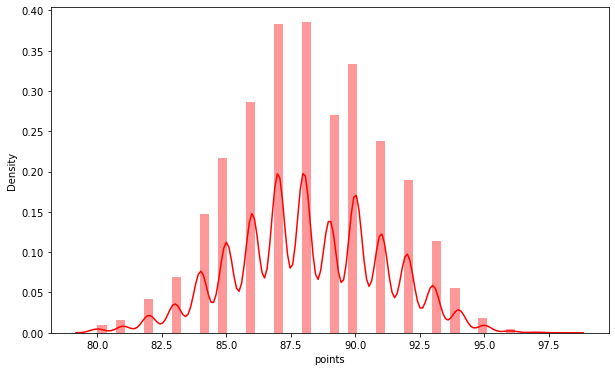

F:\sofia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


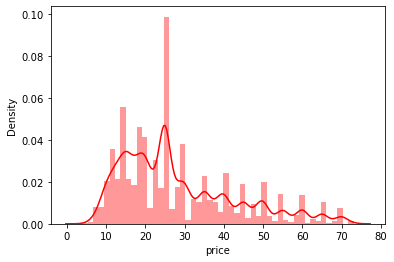

In [52]:
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.distplot(data[i], color = 'red')
    plt.show()

by the observation,

we need to normalized the skew

 # Create quality column from points values to classes of bad, ok, good, and great. Below is a function to return string quality based on the points value.

In [67]:
#Function to return string quality based on points value.
def getQuality(points):
    if(points <= 85):
        return 'bad'
    elif(points<=90 ):
        return 'ok'
    elif(points<=95):
        return 'good'
    elif(points<=100):
        return 'great'
    else:
        return 'If this gets hit, we did something wrong!'

In [68]:
# Next lets apply the function to the points column of the dataframe and add a new column named quality.
data['quality'] = data['points'].apply(getQuality)

<AxesSubplot:xlabel='quality', ylabel='price'>

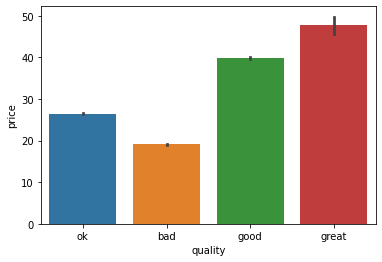

In [69]:
#Lets visualize our new column against the price column like we did above.
sns.barplot(x = 'quality', y = 'price', data = data)

less than 85 is bad

less than 90 is ok

less than 95 is good

less than 100 is great

# Create priceRange column from price column of 1-30, 31-50, 51-100, Above 100 and 0 for columns with NaN. Below is a function to return string priceRange based on price value.

In [71]:
def getPriceRange(price):
    if(price <= 30):
        return '1-30'
    elif(price<=50):
        return '31-50'
    elif(price<=100): 
        return '51-100'
    elif(math.isnan(price)):
        return '0'
    else:
        return 'Above 100'

In [72]:
#Apply the function to the points column of the dataframe and add a new column named priceRange.
data['priceRange'] = data['price'].apply(getPriceRange)

In [73]:
#Print totals for each priceRange assigned to see how the labels are distributed
data.groupby(data['priceRange']).size()

priceRange
1-30      82446
31-50     27745
51-100    10721
dtype: int64

<AxesSubplot:ylabel='priceRange'>

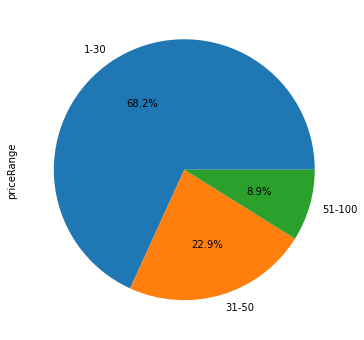

In [74]:
plt.figure(figsize=(7,6))
data['priceRange'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

by the observation,

68.2% highest sales 1-30 price range 

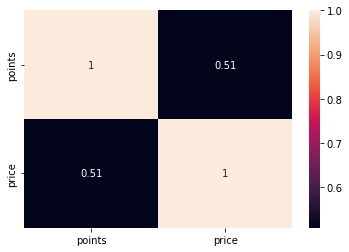

In [76]:
sns.heatmap(data.select_dtypes(['float64' , 'int64']).corr(),annot=True) 
plt.show() 

# Model Building

# Price prediction

In [108]:
from catboost import CatBoostRegressor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [93]:
data.columns

Index(['country', 'description', 'points', 'price', 'province', 'title',
       'variety', 'winery', 'quality', 'priceRange'],
      dtype='object')

In [94]:
df_model = data[['country', 'province', 'variety', 'winery', 'quality', 'price']]

In [95]:
df_model.head()


,country,province,variety,winery,quality,price
0,Italy,Sicily & Sardinia,White Blend,Nicosia,ok,25.0
1,Portugal,Douro,Portuguese Red,Quinta dos Avidagos,ok,15.0
2,US,Oregon,Pinot Gris,Rainstorm,ok,14.0
3,US,Michigan,Riesling,St. Julian,ok,13.0
4,US,Oregon,Pinot Noir,Sweet Cheeks,ok,65.0


In [97]:
X = df_model.drop('price', axis =1)
y = df_model['price']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =2000)

In [99]:
X

,country,province,variety,winery,quality
0,Italy,Sicily & Sardinia,White Blend,Nicosia,ok
1,Portugal,Douro,Portuguese Red,Quinta dos Avidagos,ok
2,US,Oregon,Pinot Gris,Rainstorm,ok
3,US,Michigan,Riesling,St. Julian,ok
4,US,Oregon,Pinot Noir,Sweet Cheeks,ok
...,...,...,...,...,...
129965,France,Alsace,Pinot Gris,Domaine Rieflé-Landmann,ok
129966,Germany,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),ok
129968,France,Alsace,Gewürztraminer,Domaine Gresser,ok
129969,France,Alsace,Pinot Gris,Domaine Marcel Deiss,ok


In [100]:
y

0         25.0
1         15.0
2         14.0
3         13.0
4         65.0
          ... 
129965    28.0
129966    28.0
129968    30.0
129969    32.0
129970    21.0
Name: price, Length: 120912, dtype: float64

In [101]:
cat_features = ['country', 'province','quality','variety','winery']

In [102]:
model_cb = CatBoostRegressor(iterations=1000, random_seed =360 , loss_function= 'RMSE')

In [104]:
model_cb.fit(X_train,y_train, cat_features= cat_features)

Learning rate set to 0.082553
0:	learn: 14.1911851	total: 60.5ms	remaining: 1m
1:	learn: 13.8147911	total: 127ms	remaining: 1m 3s
2:	learn: 13.4949592	total: 154ms	remaining: 51s
3:	learn: 13.2030306	total: 181ms	remaining: 45s
4:	learn: 12.9465041	total: 232ms	remaining: 46.1s
5:	learn: 12.7253793	total: 278ms	remaining: 46s
6:	learn: 12.5384931	total: 330ms	remaining: 46.8s
7:	learn: 12.3007977	total: 378ms	remaining: 46.9s
8:	learn: 12.0880460	total: 456ms	remaining: 50.3s
9:	learn: 11.9064761	total: 514ms	remaining: 50.9s
10:	learn: 11.7455108	total: 546ms	remaining: 49.1s
11:	learn: 11.6019193	total: 583ms	remaining: 48s
12:	learn: 11.4834103	total: 635ms	remaining: 48.2s
13:	learn: 11.3779599	total: 661ms	remaining: 46.5s
14:	learn: 11.2863384	total: 685ms	remaining: 45s
15:	learn: 11.2121505	total: 729ms	remaining: 44.9s
16:	learn: 11.1476768	total: 753ms	remaining: 43.6s
17:	learn: 11.0853981	total: 776ms	remaining: 42.4s
18:	learn: 11.0240245	total: 833ms	remaining: 43s
19:	le

In [105]:
y_pred=model_cb.predict(X_test)

In [106]:
from sklearn import metrics

In [107]:
print('Mean absolute error:' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:' , metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error:' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 7.146098442638364
Mean Squared error: 95.97277940258205
Root Mean squared error: 9.79656977735483


# Quality prediction

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [110]:
data['quality'] = le.fit_transform(data['quality'])

In [111]:
data.head(3)

,country,description,points,price,province,title,variety,winery,quality,priceRange
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,25.0,Sicily & Sardinia,Etna,White Blend,Nicosia,3,1-30
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Douro,Portuguese Red,Quinta dos Avidagos,3,1-30
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm,3,1-30


In [122]:
df_model = data[['country', 'province','variety', 'winery','quality']]

In [123]:
df_model

,country,province,variety,winery,quality
0,Italy,Sicily & Sardinia,White Blend,Nicosia,3
1,Portugal,Douro,Portuguese Red,Quinta dos Avidagos,3
2,US,Oregon,Pinot Gris,Rainstorm,3
3,US,Michigan,Riesling,St. Julian,3
4,US,Oregon,Pinot Noir,Sweet Cheeks,3
...,...,...,...,...,...
129965,France,Alsace,Pinot Gris,Domaine Rieflé-Landmann,3
129966,Germany,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),3
129968,France,Alsace,Gewürztraminer,Domaine Gresser,3
129969,France,Alsace,Pinot Gris,Domaine Marcel Deiss,3


In [124]:
X = df_model.drop(['quality'], axis =1)
y = df_model['quality']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2000)

In [126]:
cat_features = ['country', 'province','variety','winery']

In [127]:
from catboost import CatBoostClassifier

In [128]:
model_cb = CatBoostClassifier(iterations=1000, random_state =3620 )

In [129]:
model_cb.fit(X_train,y_train, cat_features= cat_features)

Learning rate set to 0.099227
0:	learn: 1.3082660	total: 107ms	remaining: 1m 47s
1:	learn: 1.2485815	total: 216ms	remaining: 1m 48s
2:	learn: 1.2009115	total: 311ms	remaining: 1m 43s
3:	learn: 1.1619692	total: 396ms	remaining: 1m 38s
4:	learn: 1.1269840	total: 488ms	remaining: 1m 37s
5:	learn: 1.0976955	total: 587ms	remaining: 1m 37s
6:	learn: 1.0728521	total: 682ms	remaining: 1m 36s
7:	learn: 1.0519833	total: 769ms	remaining: 1m 35s
8:	learn: 1.0329454	total: 866ms	remaining: 1m 35s
9:	learn: 1.0168009	total: 991ms	remaining: 1m 38s
10:	learn: 1.0005014	total: 1.1s	remaining: 1m 39s
11:	learn: 0.9865155	total: 1.2s	remaining: 1m 38s
12:	learn: 0.9666302	total: 1.29s	remaining: 1m 38s
13:	learn: 0.9483726	total: 1.39s	remaining: 1m 38s
14:	learn: 0.9326151	total: 1.48s	remaining: 1m 37s
15:	learn: 0.9194350	total: 1.57s	remaining: 1m 36s
16:	learn: 0.9077452	total: 1.69s	remaining: 1m 37s
17:	learn: 0.8979501	total: 1.78s	remaining: 1m 36s
18:	learn: 0.8896360	total: 1.87s	remaining: 1

In [130]:
y_pred=model_cb.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

In [133]:
print('Accuracy Score on testing data:', accuracy_score(y_test, y_pred))

Accuracy Score on testing data: 0.6616860561283564


In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.28      0.40      6488
           1       0.60      0.43      0.50      8015
           2       0.00      0.00      0.00        80
           3       0.67      0.86      0.76     21691

    accuracy                           0.66     36274
   macro avg       0.48      0.39      0.41     36274
weighted avg       0.65      0.66      0.63     36274



F:\sofia\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\sofia\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\sofia\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
